<a href="https://colab.research.google.com/github/Tauseef-09/The_Sparks_Foundation_Internship_Tasks/blob/main/Task_4_Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) January 2023.

# Name :- Tauseef Taufiq

##Domain:- Data Science & Business Analytics

## **Task 4 : Exploratory Data Analysis - Terrorism**

Perform 'Exploratory Data Analysis' on 'Global Terrorism', As a security/defence analyst, try to find out the hot zone of terrorism. what all security issues and insights you can drive by EDA.

* Dataset: : https://bit.ly/2TK5Xn5

---
# Table of Content


* __Step 1: Importing the Necessary Libraries__
    
* __Step 2: Data Loading__
    
* __Step 3: Exploring our Data for patterns and information.__
   
* __Step 4: Conclusion__

---

---
## Importing the Necessary Libraries
---

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


---
## Data Loading
---

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# reading the data

my_data = pd.read_csv("//content//drive//MyDrive//mount_data//globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---
## Exploring our Data for patterns and information.
---

In [4]:
my_data.shape

(181691, 135)

In [5]:
my_data.sample(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
46825,199106140002,1991,6,14,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
126102,201401180043,2014,1,18,NaN,0,NaN,205,Thailand,5,...,NaN,"""Bomb at railroad track in Cha-am, no injuries...","""Bomb-blast damages railway near Cha-am Statio...","""Thailand: SRT governor urges not to politicis...",START Primary Collection,-9,-9,0,-9,NaN
63967,199611170002,1996,11,17,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [8]:
# Changing the column names.

my_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [9]:
# Taking the important features which can be used for our Analysis.

my_data = my_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
               

In [10]:
my_data.sample(3)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
97470,2010,7,25,Russia,Kabardino Balkariya,Eastern Europe,Tegenekli,43.254300,42.616800,Bombing/Explosion,0.0,0.0,A cell retransmission tower was targeted in th...,"07/25/2010: On Sunday, in Tegenekli near Elbru...",Unknown,Telecommunication,Explosives,The specific motive for the attack is unknown.
28190,1986,5,30,Sri Lanka,Western,South Asia,Colombo,6.941837,79.861687,Bombing/Explosion,9.0,50.0,soft drink and meat manufacturing plant,NaN,Unknown,Business,Explosives,NaN
142017,2014,12,27,Pakistan,Balochistan,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,0.0,0.0,Railway Tracks,12/27/2014: Security forces discovered and def...,Unknown,Transportation,Explosives,NaN


In [11]:
my_data.isna().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [12]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [13]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
Month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
Killed,171378.0,2.403272,11.545741,0.000000e+00,0.000000,0.000000,2.000000,1570.000000
Wounded,165380.0,3.167668,35.949392,0.000000e+00,0.000000,0.000000,2.000000,8191.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


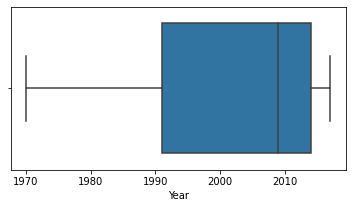

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


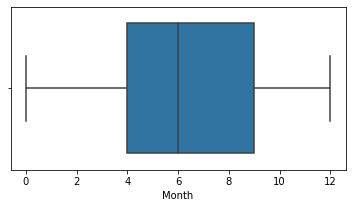

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


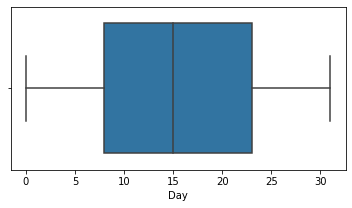

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


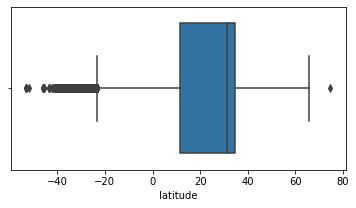

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


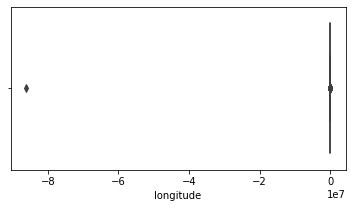

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


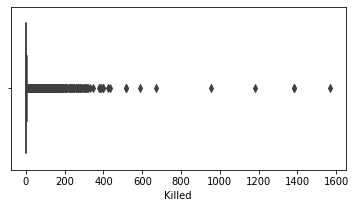

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


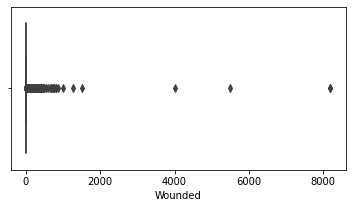

In [16]:
col_to_do = list(my_data.describe().columns)

for co in col_to_do:
    
    plt.figure(figsize=(6,3))
    sns.boxplot(my_data[co])
    plt.show()
    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


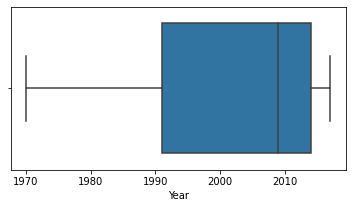

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


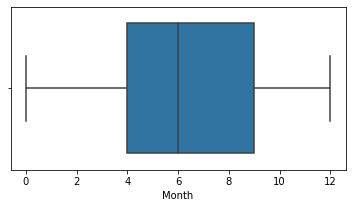

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


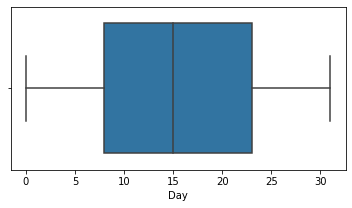

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


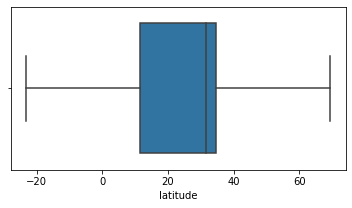

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


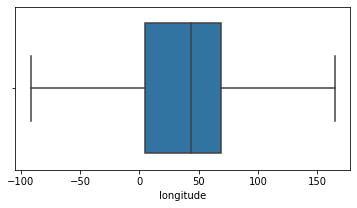

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


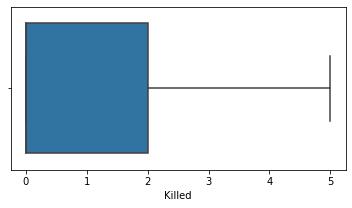

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


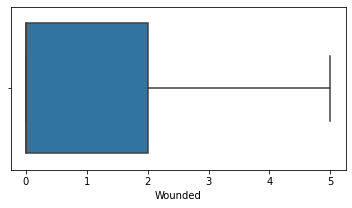

In [17]:
for co in col_to_do:
    
    percentile25 = my_data[co].quantile(0.25)
    percentile75 = my_data[co].quantile(0.75)

    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    my_data[co] = np.where(
        my_data[co] > upper_limit,
        upper_limit,
        np.where(
            my_data[co] < lower_limit,
            lower_limit,
            my_data[co]
        )
    )

    plt.figure(figsize=(6,3))
    sns.boxplot(my_data[co])
    plt.show()

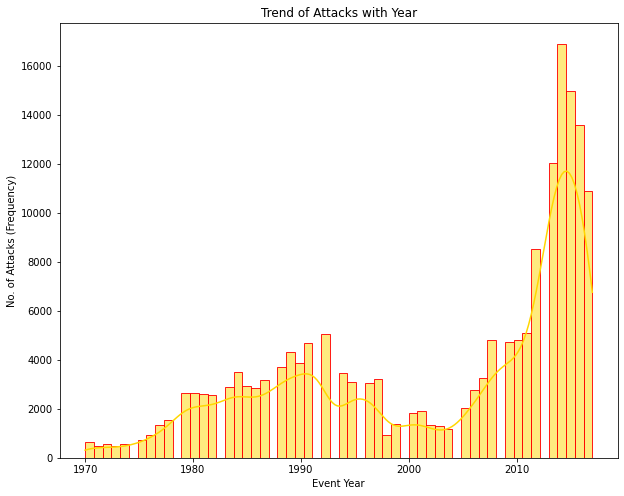

In [31]:
# Plotting no. of attacks in histogram
plt.figure(figsize=(10,8))
sns.histplot(x = 'Year',data = my_data, kde = True, color = 'gold', edgecolor = 'r')
plt.title('Trend of Attacks with Year')
plt.ylabel('No. of Attacks (Frequency)')
plt.xlabel('Event Year')
plt.show()

* The number of Attacks is gradually increasing till 1990 and then after around 2005 we can clearly see exponential increment in number of attacks.

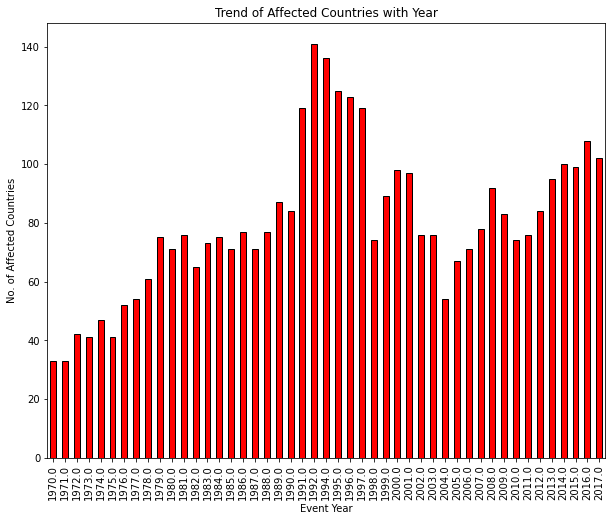

In [34]:
# Plotting no. of affected countries in bar
plt.figure(figsize=(10,8))
my_data.groupby(['Year'])['Country'].nunique().plot.bar(color = 'r', edgecolor = 'black')
plt.title('Trend of Affected Countries with Year')
plt.ylabel('No. of Affected Countries')
plt.xlabel('Event Year')
plt.show()

* On an average there are around 80 countries affected by Attacks each year from 1970 to 2017.


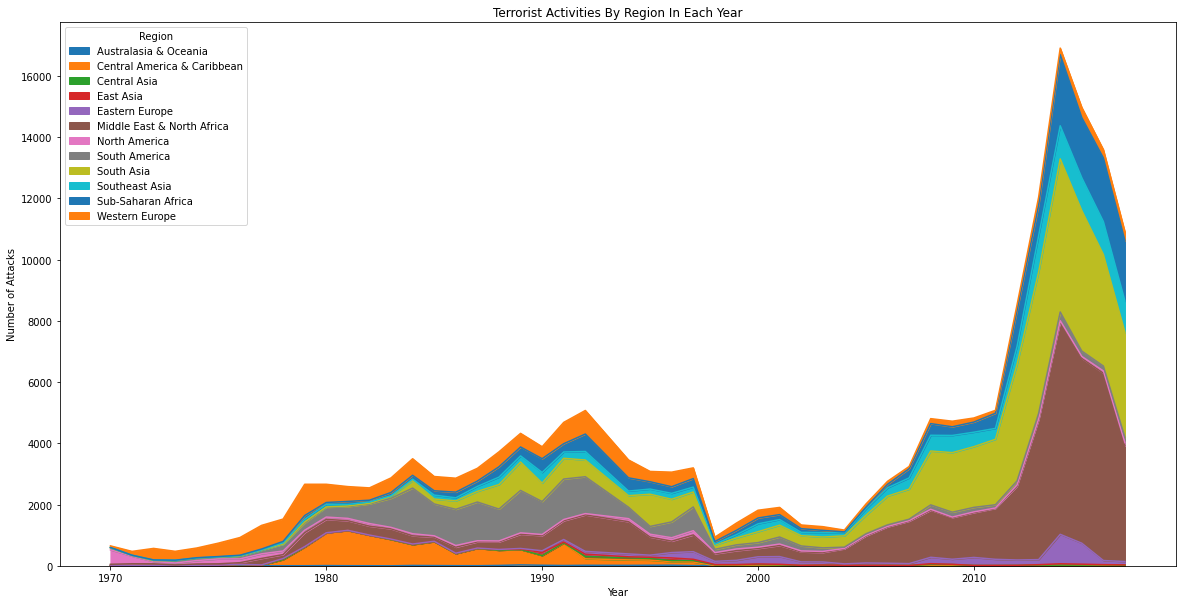

In [42]:
pd.crosstab(my_data.Year, my_data.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

* There is increment in number of attacks is higher in south asia, middle east and north africa regions from 1970 to 2017.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


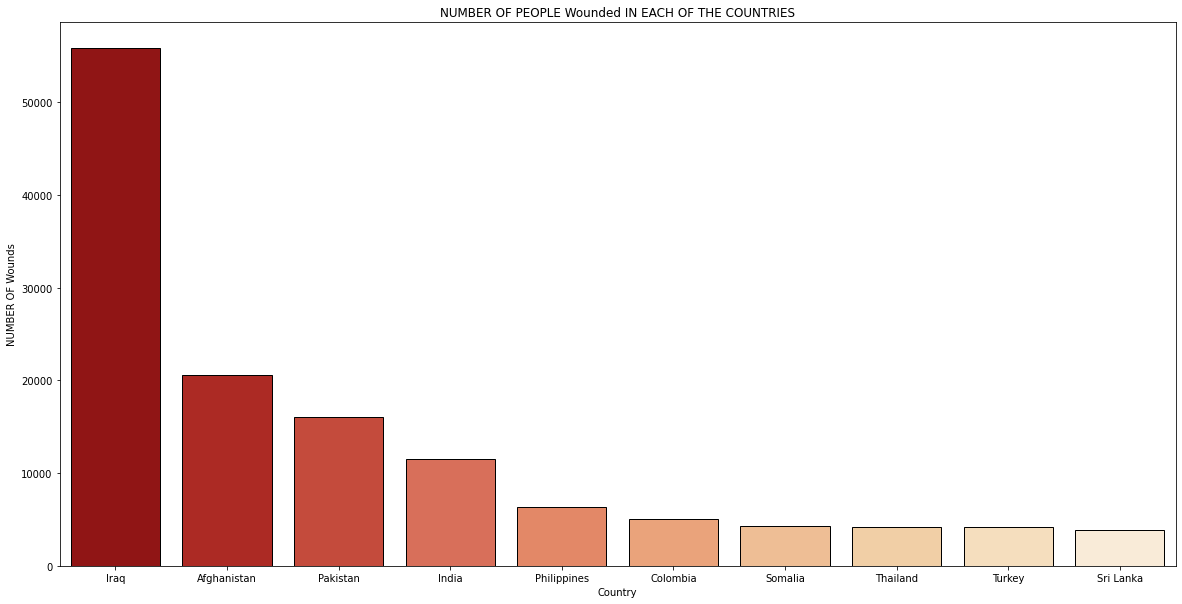

In [45]:

group_wounded = my_data[['Country','Wounded']].groupby(['Country'],axis=0).sum().sort_values('Wounded', ascending=False).head(10)

plt.subplots(figsize=(20,10))
plt.title('NUMBER OF PEOPLE Wounded IN EACH OF THE COUNTRIES')
plt.xlabel('COUNTRIES')
plt.ylabel('NUMBER OF Wounds')
sns.barplot(group_wounded.index, group_wounded.Wounded.values, palette = 'OrRd_r', ec = 'black')
     

* Iraq is the country in which most number of people are wounded because of attacks.


Text(0.5, 1.0, 'Number of Total Attacks in Each Region')

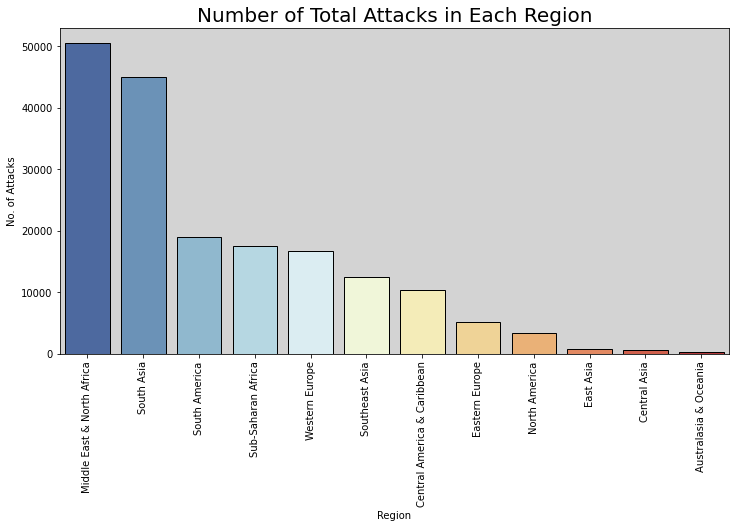

In [53]:

region_attacks = my_data['Region'].value_counts().reset_index().rename(columns = {'index':'Region','Region':'No. of Attacks'}).head(15)

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.subplots(figsize = (12,6))
sns.barplot(x = region_attacks['Region'], y = region_attacks['No. of Attacks'],palette = 'RdYlBu_r',ec = 'black')
plt.xticks(rotation = 90) 
plt.title('Number of Total Attacks in Each Region' ,fontsize = 20)


<function matplotlib.pyplot.show(*args, **kw)>

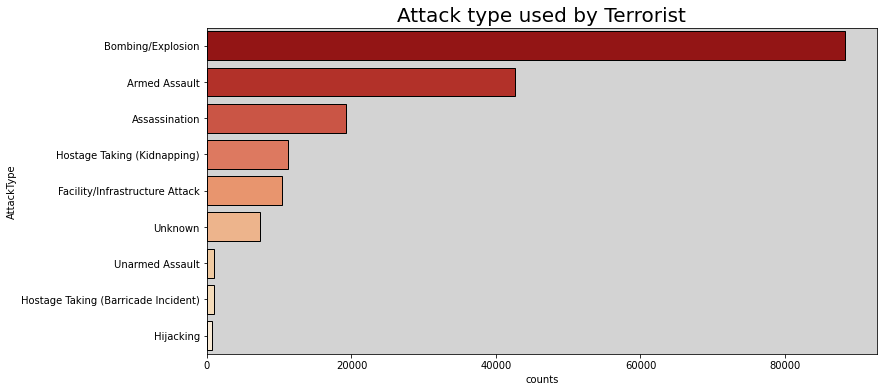

In [51]:

attack_used = my_data['AttackType'].value_counts().reset_index().rename(columns = {'index':'AttackType','AttackType':'counts'})

plt.subplots(figsize = (12,6))

sns.barplot(x =attack_used['counts'] , y = attack_used['AttackType'] ,palette = 'OrRd_r',ec = 'black' )

# plt.xticks(rotation = 'vertical')
plt.title('Attack type used by Terrorist',fontsize = 20)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

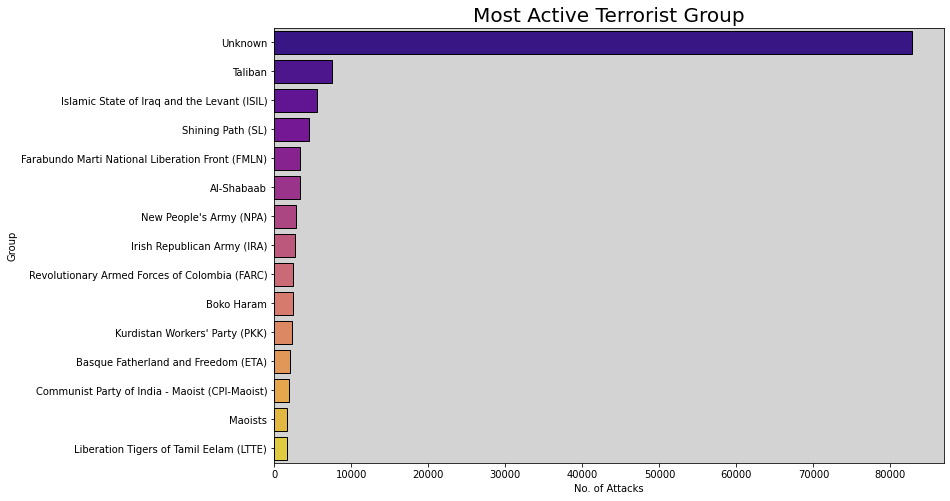

In [52]:

Active_gp = my_data['Group'].value_counts().reset_index().rename(columns = {'index': 'Group','Group':'No. of Attacks'}).head(15)

plt.subplots(figsize = (12,8))

sns.barplot(x =Active_gp['No. of Attacks'] , y = Active_gp['Group'] ,palette = 'plasma',ec = 'black' )

# plt.xticks(rotation = 'vertical')
plt.title('Most Active Terrorist Group',fontsize = 20)
plt.show


* The Attacks by Talibans and  ISIL is highest.

---

## **Conclusion**:

* The number of Attacks is gradually increasing till 1990 and then after around 2005 we can clearly see exponential increment in number of attacks.

* On an average there are around 80 countries affected by Attacks each year from 1970 to 2017.

* There is increment in number of attacks is higher in south asia, middle east and north africa regions from 1970 to 2017.

* Iraq is the country in which most number of people are wounded because of attacks.

* The Attacks by Talibans and  ISIL is highest.

---
---